# SAKI- SS21- Excercise 1

## Import libraries and read required input data from source

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import re

# read csv-input-file
data = pd.read_csv('SAKI Exercise 1 - Transaction Classification - Data Set.csv', ';')
data

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure
...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,NaN,15.02.2016,15.02.2016,Mieteinnahmen,Mietzuschuss End-To-End-Ref.: Notprovided Kund...,Isabel Anna,DE31251900019736000780,VOHADE2HXXX,200.00,EUR,finance
205,205,NaN,02.02.2016,02.02.2016,Geldanlage,Ccbade31Xxx De71310108339900123456 Sparen End-...,Michael Koffer,DE69790800529736000780,DRESDEFF790,-300.00,EUR,finance
206,206,NaN,28.01.2016,28.01.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
207,207,NaN,28.01.2016,28.01.2016,Geldanlage,Ssknde77Xxx De41760501010012345675 Einmalspare...,Christina Jung,DE31251900019736333780,VOHADE2HXXX,-4000.00,EUR,finance


## Data cleaning

In [155]:
#delete unnecessary columns
data = data.drop(columns=["Unnamed: 0","Auftragskonto","Buchungstag","Valutadatum", "Kontonummer", "BLZ","Betrag","Waehrung"])
data

,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,label
0,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,income
1,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,living
2,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,private
3,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,standardOfLiving
4,Spontanausgabe,Amazon,neue Playstation,leisure
...,...,...,...,...
204,Mieteinnahmen,Mietzuschuss End-To-End-Ref.: Notprovided Kund...,Isabel Anna,finance
205,Geldanlage,Ccbade31Xxx De71310108339900123456 Sparen End-...,Michael Koffer,finance
206,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,income
207,Geldanlage,Ssknde77Xxx De41760501010012345675 Einmalspare...,Christina Jung,finance


In [156]:
#get german stopwords
germanstopwords = stopwords.words('german')

#clean Buchungtext 
data.Buchungstext = data.Buchungstext.str.lower()
data.Buchungstext = data.Buchungstext.str.replace('[^a-z-]', ' ')
data.Buchungstext = data.Buchungstext.str.replace('\s+', ' ', regex=True)
data.Buchungstext = data.Buchungstext.apply(lambda text: ' '.join([word for word in text.split() if word not in (germanstopwords)]))

#clean Verwendungszweck  
data.Verwendungszweck  = data.Verwendungszweck .str.lower()
data.Verwendungszweck  = data.Verwendungszweck .str.replace('[^a-z-]', ' ')
data.Verwendungszweck  = data.Verwendungszweck .str.replace('\s+', ' ', regex=True)
data.Verwendungszweck  = data.Verwendungszweck .apply(lambda text: ' '.join([word for word in text.split() if word not in (germanstopwords)]))

data

,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,label
0,lohn gehalt,gehalt adorsys gmbh co kg end-to-end-ref notpr...,Adorsys GmbH & Co. KG,income
1,miete,byladem sbt de miete beuthener str end-to-end-...,Georg Tasche,living
2,bargeld,uhr nuernberg all eur geb eur einzahlung ausza...,Bargeld,private
3,lebensmittel getraenke,edeka neubauer nuernb nuernb - - t kfn vj last...,Kartenzahlung,standardOfLiving
4,spontanausgabe,amazon,neue Playstation,leisure
...,...,...,...,...
204,mieteinnahmen,mietzuschuss end-to-end-ref notprovided kunden...,Isabel Anna,finance
205,geldanlage,ccbade xxx de sparen end-to-end-ref notprovide...,Michael Koffer,finance
206,lohn gehalt,gehalt adorsys gmbh co kg end-to-end-ref notpr...,Adorsys GmbH & Co. KG,income
207,geldanlage,ssknde xxx de einmalsparen end-to-end-ref ccb ...,Christina Jung,finance


## Create train and test data set


In [157]:
label_encoder = LabelEncoder()

#get labels
y = label_encoder.fit_transform(data['label'].tolist())

count_vectorizer = CountVectorizer(lowercase=True)
Verwendungszweck = count_vectorizer.fit_transform(data['Verwendungszweck']).toarray()
Buchungstext = np.reshape(label_encoder.fit_transform(data['Buchungstext']), (len(y), 1))
Beguenstigter = np.reshape(label_encoder.fit_transform(data['Beguenstigter/Zahlungspflichtiger']), (len(y), 1))

#get x
x = np.concatenate((Buchungstext,Verwendungszweck, Beguenstigter), axis = 1)

#split preprocessed data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


## Train Data

In [158]:
#create GaussianNB model and training
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Test Data

In [159]:
#predict label for the test data set
y_predict = model.predict(x_test)
y_predict

array([5, 4, 2, 5, 5, 1, 0, 3, 4, 2, 3, 5, 5, 1, 2, 1, 0, 2, 3, 0, 4, 2,
       5, 0, 1, 2, 2, 4, 2, 5, 1, 5, 0, 5, 5, 5, 2, 2, 5, 1, 4, 2],
      dtype=int64)

## Evaluation

### Create report 

In [160]:
#create a report with precision, recall, f1-score and support for each class and accuracy of f1-score
report = classification_report(y_test, y_predict, target_names= [ 'income','private','living','standardOfLiving','finance','leisure',   ])
print(report)

                  precision    recall  f1-score   support

          income       1.00      0.83      0.91         6
         private       1.00      1.00      1.00         6
          living       1.00      0.85      0.92        13
standardOfLiving       1.00      0.75      0.86         4
         finance       0.60      1.00      0.75         3
         leisure       0.83      1.00      0.91        10

        accuracy                           0.90        42
       macro avg       0.91      0.90      0.89        42
    weighted avg       0.93      0.90      0.91        42



### Create confusion matrix

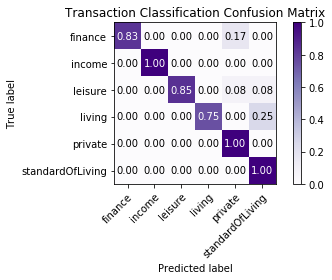

In [161]:
#create confusion matrix for y_test and y_predict
cf_matrix = confusion_matrix(y_test, y_predict)
cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
cmap = plt.cm.Purples
figure, axis = plt.subplots()
im = axis.imshow(cf_matrix, interpolation='nearest', cmap=cmap)
axis.figure.colorbar(im, ax=axis)
axis.grid(False)


#Set the axis
axis.set(xticks=np.arange(cf_matrix.shape[1]), 
       yticks=np.arange(cf_matrix.shape[0]), 
       xticklabels=classes, 
       yticklabels=classes, 
       title='Transaction Classification Confusion Matrix', 
       ylabel='True label', 
       xlabel='Predicted label')

#Rotate labels
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#create text annotations inside the matrix
fmt = '.2f'
thresh = cf_matrix.max() / 2.
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        axis.text(j, i, format(cf_matrix[i, j], fmt), 
                ha="center", va="center", 
                color="white" if cf_matrix[i, j] > thresh else "black")
figure.tight_layout()
plt.show()